In [1]:
import pandas as pd

ldaResults = pd.read_csv("LDA-Results.csv")

In [2]:
ldaResults.columns = ["_", "Model", "Corpus", "Alpha", "Beta", "Number of Topics", "Top Words", "CV Score", "C_UCI Score"]
groupedLdaResults = ldaResults.groupby(ldaResults.Corpus)

sacStaffLda = groupedLdaResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerLda = groupedLdaResults.get_group("Compiled Data Challenges - Volunteer")
compiledLda = groupedLdaResults.get_group("Compiled Data Challenges")

In [3]:
sacStaffLda = sacStaffLda.astype({"Alpha":str})
sacStaffLda.dtypes["Alpha"]

sacStaffLda.head(100)

,_,Model,Corpus,Alpha,Beta,Number of Topics,Top Words,CV Score,C_UCI Score
0,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,4,"[(0, '0.047*""senior"" + 0.034*""want"" + 0.027*""e...",0.434021,-7.057445
1,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,6,"[(0, '0.037*""senior"" + 0.034*""want"" + 0.022*""k...",0.391622,-7.979534
2,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,8,"[(0, '0.051*""senior"" + 0.034*""come"" + 0.031*""w...",0.432774,-8.145107
3,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,10,"[(0, '0.035*""want"" + 0.035*""exercise"" + 0.030*...",0.398969,-8.235137
4,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.01,12,"[(0, '0.044*""exercise"" + 0.039*""session"" + 0.0...",0.404130,-8.125948
...,...,...,...,...,...,...,...,...,...
95,0,LDA,Compiled Data Challenges - SAC Staff,0.01,symmetric,2,"[(0, '0.023*""senior"" + 0.016*""want"" + 0.016*""k...",0.418694,-5.138719
96,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.9099999999999999,44,"[(0, '0.006*""much"" + 0.006*""mobile"" + 0.004*""s...",0.571664,-9.955470
97,0,LDA,Compiled Data Challenges - SAC Staff,0.01,symmetric,4,"[(0, '0.035*""senior"" + 0.021*""exercise"" + 0.02...",0.440878,-7.094992
98,0,LDA,Compiled Data Challenges - SAC Staff,0.01,0.9099999999999999,46,"[(0, '0.014*""exercise"" + 0.011*""group"" + 0.011...",0.581643,-9.383541


In [4]:
import re

def lda_pd_series_to_dict (series):
    res = {}
    series = series.split(",")
    for index in range(0, len(series)-1, 2):
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        res[series[index]] = [word.strip() for word in re.findall(r'"(.*?)"', series[index+1])]
        
    return res

<AxesSubplot:xlabel='Number of Topics', ylabel='CV Score'>

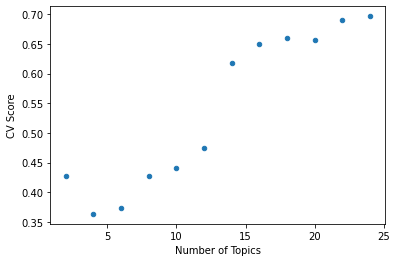

In [5]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.9099999999999999") & (sacStaffLda["Beta"]=="0.31") ] & (sacStaffLda["Number of Topics"] <= 25)
sampleDf.plot.scatter(x="Number of Topics", y="CV Score")

<AxesSubplot:xlabel='Number of Topics', ylabel='C_UCI Score'>

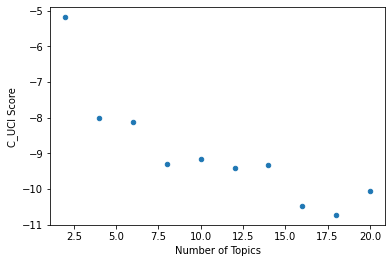

In [30]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.9099999999999999") & (sacStaffLda["Beta"]=="0.31") & (sacStaffLda["Number of Topics"] <= 20)]

sampleDf.plot.scatter(x="Number of Topics", y="C_UCI Score")

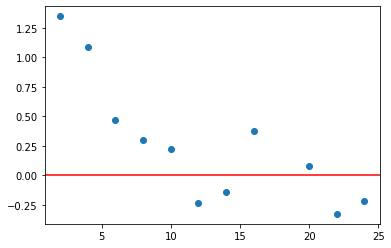

In [7]:
import numpy as np
import matplotlib.pyplot as plt

sampleCUCIScores = sampleDf["C_UCI Score"]
d2CUCIScores = np.gradient(np.gradient(sampleCUCIScores))

plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(sampleDf["Number of Topics"], d2CUCIScores)

<AxesSubplot:xlabel='Number of Topics', ylabel='C_UCI Score'>

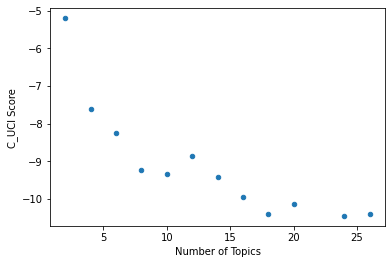

In [8]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.61") & (sacStaffLda["Beta"]=="0.31") & (sacStaffLda["C_UCI Score"]>=-10.5)]

sampleDf.plot.scatter(x="Number of Topics", y="C_UCI Score")

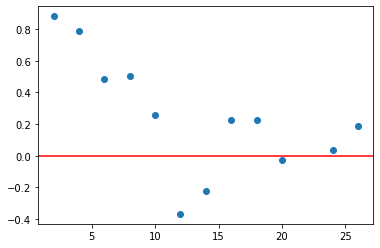

In [9]:
import numpy as np
import matplotlib.pyplot as plt

sampleCUCIScores = sampleDf["C_UCI Score"]
d2CUCIScores = np.gradient(np.gradient(sampleCUCIScores))

plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(sampleDf["Number of Topics"], d2CUCIScores)

<AxesSubplot:xlabel='Number of Topics', ylabel='CV Score'>

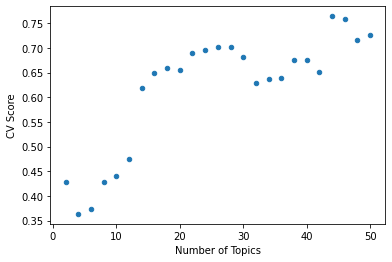

In [10]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.9099999999999999") & (sacStaffLda["Beta"]=="0.31")]
sampleDf.plot.scatter(x="Number of Topics", y="CV Score")

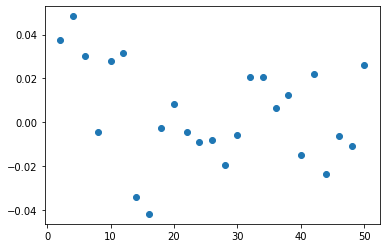

In [11]:
import numpy as np
import matplotlib.pyplot as plt

sampleCVScores = sampleDf["CV Score"]
d2CVScores = np.gradient(np.gradient(sampleCVScores))

plt.scatter(sampleDf["Number of Topics"], d2CVScores)

<AxesSubplot:xlabel='Number of Topics', ylabel='CV Score'>

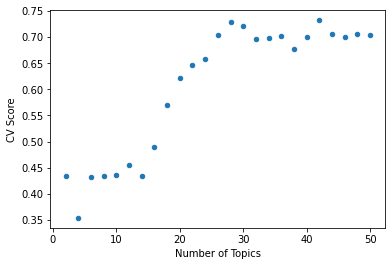

In [12]:
sampleDf = sacStaffLda[(sacStaffLda["Alpha"]=="0.61") & (sacStaffLda["Beta"]=="0.31")]
sampleDf.plot.scatter(x="Number of Topics", y="CV Score")

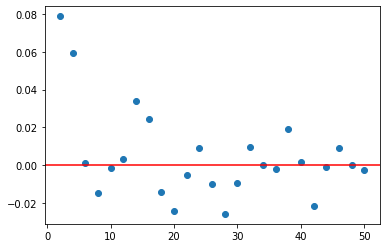

In [13]:
sampleCVScores = sampleDf["CV Score"]
d2CVScores = np.gradient(np.gradient(sampleCVScores))

plt.axhline(y=0, color='r', linestyle='-')
plt.scatter(sampleDf["Number of Topics"], d2CVScores)

# CONCLUSION: The number of topic before the min D2 is the best Num of Topics

In [31]:
ldaBestScoresPerParams = pd.DataFrame()
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

params = [(a, b) for a in alpha for b in beta]

for df in [sacStaffLda, volunteerLda, compiledLda]:
    for param in params:
        ldaForThisParam = df[(df["Alpha"]==str(param[0])) & (df["Beta"]==str(param[1])) & (df["Number of Topics"]<=20)]
        cvScoreForThisParam = ldaForThisParam["CV Score"]
        cuciScoreForThisParam = ldaForThisParam["C_UCI Score"]

        cvD2 = np.gradient(np.gradient(cvScoreForThisParam))
        cuciD2 = np.gradient(np.gradient(cuciScoreForThisParam))

        cvMinIndex = np.where(cvD2 == np.amin(cvD2))
        cuciMinIndex = np.where(cuciD2 == np.amin(cuciD2))

        ldaBestScoresPerParams = pd.concat([ldaForThisParam.iloc[[cvMinIndex[0][0]-1]], ldaBestScoresPerParams])
        ldaBestScoresPerParams = pd.concat([ldaForThisParam.iloc[[cuciMinIndex[0][0]-1]], ldaBestScoresPerParams])
    
ldaBestScoresPerParams["Top Words"] = ldaBestScoresPerParams["Top Words"].apply(lambda i: lda_pd_series_to_dict(i))
sortedLdaBestScoresPerParams =  ldaBestScoresPerParams.sort_values("CV Score", ascending=False)
print (sortedLdaBestScoresPerParams.head(10))

      _ Model                                Corpus               Alpha  \
332   0   LDA  Compiled Data Challenges - SAC Staff                0.61   
1207  0   LDA              Compiled Data Challenges  0.9099999999999999   
1083  0   LDA              Compiled Data Challenges                0.61   
1183  0   LDA              Compiled Data Challenges  0.9099999999999999   
1953  0   LDA  Compiled Data Challenges - Volunteer  0.9099999999999999   
1204  0   LDA              Compiled Data Challenges  0.9099999999999999   
405   0   LDA  Compiled Data Challenges - SAC Staff  0.9099999999999999   
1180  0   LDA              Compiled Data Challenges  0.9099999999999999   
1782  0   LDA  Compiled Data Challenges - Volunteer                0.61   
429   0   LDA  Compiled Data Challenges - SAC Staff  0.9099999999999999   

                    Beta  Number of Topics  \
332   0.9099999999999999                18   
1207  0.9099999999999999                18   
1083  0.9099999999999999            

In [32]:
ldaBestScores = pd.DataFrame()

groupedLdaBestScoresPerParams = ldaBestScoresPerParams.groupby(ldaBestScoresPerParams.Corpus)

sacStaffLdaBestScoresPerParams = groupedLdaBestScoresPerParams.get_group("Compiled Data Challenges - SAC Staff")
volunteerLdaBestScoresPerParams = groupedLdaBestScoresPerParams.get_group("Compiled Data Challenges - Volunteer")
compiledLdaBestScoresPerParams = groupedLdaBestScoresPerParams.get_group("Compiled Data Challenges")

sacStaffBestCVScores = sacStaffLdaBestScoresPerParams["CV Score"].nlargest(5)
sacStaffBestCUCIScores =sacStaffLdaBestScoresPerParams["C_UCI Score"].nsmallest(5)
ldaBestScores = pd.concat([sacStaffLdaBestScoresPerParams.loc[sacStaffLdaBestScoresPerParams["CV Score"].isin(sacStaffBestCVScores)], ldaBestScores])
ldaBestScores = pd.concat([sacStaffLdaBestScoresPerParams.loc[sacStaffLdaBestScoresPerParams["C_UCI Score"].isin(sacStaffBestCUCIScores)], ldaBestScores])

volunteerBestCVScores = volunteerLdaBestScoresPerParams["CV Score"].nlargest(5)
volunteerBestCUCIScores =volunteerLdaBestScoresPerParams["C_UCI Score"].nsmallest(5)
ldaBestScores = pd.concat([volunteerLdaBestScoresPerParams.loc[volunteerLdaBestScoresPerParams["CV Score"].isin(volunteerBestCVScores)], ldaBestScores])
ldaBestScores = pd.concat([volunteerLdaBestScoresPerParams.loc[volunteerLdaBestScoresPerParams["C_UCI Score"].isin(volunteerBestCUCIScores)], ldaBestScores])

compiledBestCVScores = compiledLdaBestScoresPerParams["CV Score"].nlargest(5)
compiledBestCUCIScores =compiledLdaBestScoresPerParams["C_UCI Score"].nsmallest(5)
ldaBestScores = pd.concat([compiledLdaBestScoresPerParams.loc[compiledLdaBestScoresPerParams["CV Score"].isin(compiledBestCVScores)], ldaBestScores])
ldaBestScores = pd.concat([compiledLdaBestScoresPerParams.loc[compiledLdaBestScoresPerParams["C_UCI Score"].isin(compiledBestCUCIScores)], ldaBestScores])

ldaBestScores.to_csv("Test 20 Topics.csv")

In [ ]:
print (sacStaffBestCVScores)

311    0.712892
200    0.710728
286    0.703677
175    0.699402
211    0.652896
Name: CV Score, dtype: float64


In [ ]:
lfldaResults = pd.read_csv("LFLDA-Results.csv")
lfldaResults['Corpus'] = lfldaResults['Corpus'].str.strip()

lfldaResults.head(100)

,Unnamed: 0,Corpus,Number of Topics,Alpha,Beta,Lambda,Top Words,CV Score,C_UCI Score
0,0,Compiled Data Challenges - SAC Staff,2,0.01,0.01,0.31,"[',senior,like,know,actually,time,people,cente...",0.427647,-4.985674
1,1,Compiled Data Challenges - SAC Staff,16,0.01,0.01,0.01,"[',profile,senior,activity,like,center,woodlan...",0.418972,-9.225453
2,2,Compiled Data Challenges - SAC Staff,12,0.01,0.01,0.01,"[',something,difficult,exercise,sometimes,chal...",0.438114,-8.682892
3,3,Compiled Data Challenges - SAC Staff,2,0.01,0.01,0.01,"[',senior,center,actually,like,know,kind,chall...",0.476811,-4.268189
4,4,Compiled Data Challenges - SAC Staff,8,0.01,0.01,0.01,"[',time,take,know,challenge,think,number,frien...",0.364066,-8.645628
...,...,...,...,...,...,...,...,...,...
95,95,Compiled Data Challenges - SAC Staff,42,0.01,0.01,0.91,"[',outreach,many,catered,uptrend,medically,cat...",0.714170,-14.838322
96,96,Compiled Data Challenges - SAC Staff,40,0.01,0.01,0.91,"[',wheelchair,actually,really,reluctant,subtit...",0.707402,-14.803842
97,97,Compiled Data Challenges - SAC Staff,44,0.01,0.01,0.91,"[',certain,catered,time,uptrend,senior,medical...",0.698479,-14.663492
98,98,Compiled Data Challenges - SAC Staff,46,0.01,0.01,0.91,"[',want,come,session,find,break,clock,reluctan...",0.694280,-14.451184


In [ ]:
groupedLfldaResults = lfldaResults.groupby(lfldaResults.Corpus)

sacStaffLflda = groupedLfldaResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerLflda = groupedLfldaResults.get_group("Compiled Data Challenges - Volunteer")
compiledLflda = groupedLfldaResults.get_group("Compiled Data Challenges")

In [ ]:
import re

def lflda_pd_series_to_dict (series):
    res = {}
    series = series.split("'")
    topic_num = 0
    for index in range(0, len(series)-1):
        series[index] = series[index].replace(",", " ")
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        if len(series[index]) > 0:
            res[topic_num] = series[index]
            topic_num += 1
        
    return res

In [ ]:
lfldaBestScoresPerParams = pd.DataFrame()
alpha = [0.01, 0.31, 0.61, 0.91]

beta = [0.01, 0.31, 0.61, 0.91]

lamda = [0.01, 0.31, 0.61, 0.91]

params = [(a, b, l) for a in alpha for b in beta for l in lamda]

for df in [sacStaffLflda, volunteerLflda, compiledLflda]:
    for param in params:
        lfldaForThisParam = df[(df["Alpha"]==param[0]) & (df["Beta"]==param[1]) & (df["Lambda"]==param[2]) & (df["Number of Topics"]<=20)]

        cvScoreForThisParam = lfldaForThisParam["CV Score"]
        cuciScoreForThisParam = lfldaForThisParam["C_UCI Score"]

        cvD2 = np.gradient(np.gradient(cvScoreForThisParam))
        cuciD2 = np.gradient(np.gradient(cuciScoreForThisParam))
        
        cvMinIndex = np.where(cvD2 == np.amin(cvD2))
        cuciMinIndex = np.where(cuciD2 == np.amin(cuciD2))

        lfldaBestScoresPerParams = pd.concat([lfldaForThisParam.iloc[[cvMinIndex[0][0]-1]], lfldaBestScoresPerParams])
        lfldaBestScoresPerParams = pd.concat([lfldaForThisParam.iloc[[cuciMinIndex[0][0]-1]], lfldaBestScoresPerParams])
    
lfldaBestScoresPerParams["Top Words"] = lfldaBestScoresPerParams["Top Words"].apply(lambda i: lflda_pd_series_to_dict(i))
sortedLfldaBestScoresPerParams =  lfldaBestScoresPerParams.sort_values("CV Score", ascending=False)
print (sortedLfldaBestScoresPerParams.head(10))

      Unnamed: 0                                Corpus  Number of Topics  \
2000        2000              Compiled Data Challenges                50   
3200        3200              Compiled Data Challenges                50   
1988        1988              Compiled Data Challenges                26   
2400        2400              Compiled Data Challenges                44   
1200        1200  Compiled Data Challenges - SAC Staff                50   
2380        2380              Compiled Data Challenges                10   
2300        2300              Compiled Data Challenges                50   
2800        2800              Compiled Data Challenges                50   
1100        1100  Compiled Data Challenges - SAC Staff                48   
800          800  Compiled Data Challenges - SAC Staff                50   

      Alpha  Beta  Lambda                                          Top Words  \
2000   0.01  0.91    0.91  {0: 'simplicity reluctant subtitle difficulty ...   
320

In [ ]:
lfldaBestScores = pd.DataFrame()

groupedLfldaBestScoresPerParams = lfldaBestScoresPerParams.groupby(lfldaBestScoresPerParams.Corpus)

sacStaffLfldaBestScoresPerParams = groupedLfldaBestScoresPerParams.get_group("Compiled Data Challenges - SAC Staff")
volunteerLfldaBestScoresPerParams = groupedLfldaBestScoresPerParams.get_group("Compiled Data Challenges - Volunteer")
compiledLfldaBestScoresPerParams = groupedLfldaBestScoresPerParams.get_group("Compiled Data Challenges")

sacStaffBestCVScores = sacStaffLfldaBestScoresPerParams["CV Score"].nlargest(5)
sacStaffBestCUCIScores =sacStaffLfldaBestScoresPerParams["C_UCI Score"].nsmallest(5)
lfldaBestScores = pd.concat([sacStaffLfldaBestScoresPerParams.loc[sacStaffLfldaBestScoresPerParams["CV Score"].isin(sacStaffBestCVScores)], lfldaBestScores])
lfldaBestScores = pd.concat([sacStaffLfldaBestScoresPerParams.loc[sacStaffLfldaBestScoresPerParams["C_UCI Score"].isin(sacStaffBestCUCIScores)], lfldaBestScores])

volunteerBestCVScores = volunteerLfldaBestScoresPerParams["CV Score"].nlargest(5)
volunteerBestCUCIScores =volunteerLfldaBestScoresPerParams["C_UCI Score"].nsmallest(5)
lfldaBestScores = pd.concat([volunteerLfldaBestScoresPerParams.loc[volunteerLfldaBestScoresPerParams["CV Score"].isin(volunteerBestCVScores)], lfldaBestScores])
lfldaBestScores = pd.concat([volunteerLfldaBestScoresPerParams.loc[volunteerLfldaBestScoresPerParams["C_UCI Score"].isin(volunteerBestCUCIScores)], lfldaBestScores])

compiledBestCVScores = compiledLfldaBestScoresPerParams["CV Score"].nlargest(5)
compiledBestCUCIScores =compiledLfldaBestScoresPerParams["C_UCI Score"].nsmallest(5)
lfldaBestScores = pd.concat([compiledLfldaBestScoresPerParams.loc[compiledLfldaBestScoresPerParams["CV Score"].isin(compiledBestCVScores)], lfldaBestScores])
lfldaBestScores = pd.concat([compiledLfldaBestScoresPerParams.loc[compiledLfldaBestScoresPerParams["C_UCI Score"].isin(compiledBestCUCIScores)], lfldaBestScores])

In [ ]:
lfldaBestScores.to_csv("Best LFLDA Results.csv")

In [ ]:
word2vecResults = pd.read_csv("Word2Vec-Results.csv")
word2vecResults.columns = ["_", "Model", "Corpus", "Number of Topics", "Top Words", "CV Score", "C_UCI Score"]

word2vecResults.head()

,_,Model,Corpus,Number of Topics,Top Words,CV Score,C_UCI Score
0,0,Word2Vec,Compiled Data Challenges - SAC Staff,4,"[['think', 'every', 'different', 'problem', 'd...",0.352469,-11.296180
1,0,Word2Vec,Compiled Data Challenges - SAC Staff,6,"[['think', 'every', 'different', 'problem', 'd...",0.392946,-12.863068
2,0,Word2Vec,Compiled Data Challenges - SAC Staff,8,"[['think', 'mean', 'know', 'maybe', 'sense', '...",0.488517,-11.321904
3,0,Word2Vec,Compiled Data Challenges - SAC Staff,10,"[['think', 'come', 'listening', 'contact', 'kn...",0.455072,-12.024413
4,0,Word2Vec,Compiled Data Challenges - SAC Staff,12,"[['think', 'example', 'somehow', 'know', 'case...",0.455776,-12.587042


In [ ]:
groupedWord2VecResults = word2vecResults.groupby(word2vecResults.Corpus)

sacStaffWord2Vec = groupedWord2VecResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerWord2Vec = groupedWord2VecResults.get_group("Compiled Data Challenges - Volunteer")
compiledWord2Vec = groupedWord2VecResults.get_group("Compiled Data Challenges")

In [ ]:
import re

def word2vec_pd_series_to_dict (series):
    res = {}
    series = series.split(']')
    topic_num = 0
    for index in range(0, len(series)-1):
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        res[topic_num] = series[index]
        topic_num += 1
        
    return res

In [33]:
word2vecBestScores = pd.DataFrame()

for df in [sacStaffWord2Vec, volunteerWord2Vec, compiledWord2Vec]:
    df = df[(df["Number of Topics"]<=20)]

    cvLWord2Vec = df["CV Score"].nlargest(5)
    cvBestWord2Vec = df.loc[df["CV Score"].isin(cvLWord2Vec)]
    cvBestWord2Vec["Top Words"] = cvBestWord2Vec["Top Words"].apply(lambda i: word2vec_pd_series_to_dict(i))

    cuciWord2Vec = df["C_UCI Score"].nsmallest(5)
    cuciBestWord2Vec = df.loc[df["C_UCI Score"].isin(cuciWord2Vec)]
    cuciBestWord2Vec["Top Words"] = cuciBestWord2Vec["Top Words"].apply(lambda i: word2vec_pd_series_to_dict(i))

    word2vecBestScores = pd.concat([cvBestWord2Vec, word2vecBestScores])
    word2vecBestScores = pd.concat([cuciBestWord2Vec, word2vecBestScores])

print(word2vecBestScores)

NameError: name 'sacStaffWord2Vec' is not defined

In [ ]:
bertResults = pd.read_csv("Bert-Results.csv")
bertResults.columns = ["_", "Model", "Corpus", "Number of Topics", "Top Words", "CV Score", "C_UCI Score"]

bertResults.head()

,_,Model,Corpus,Number of Topics,Top Words,CV Score,C_UCI Score
0,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,4,"[['think', 'every', 'centre', 'different', 'se...",0.566267,-5.682990
1,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,6,"[['think', 'every', 'centre', 'different', 'se...",0.555523,-6.485973
2,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,8,"[['think', 'every', 'centre', 'different', 'se...",0.516807,-6.749988
3,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,10,"[['think', 'every', 'centre', 'different', 'se...",0.582084,-7.604686
4,0,BERT - Transformer,Compiled Data Challenges - SAC Staff,12,"[['think', 'every', 'centre', 'different', 'se...",0.483858,-7.523222


In [ ]:
groupedBertResults = bertResults.groupby(bertResults.Corpus)

sacStaffBert = groupedBertResults.get_group("Compiled Data Challenges - SAC Staff")
volunteerBert = groupedBertResults.get_group("Compiled Data Challenges - Volunteer")
compiledBert = groupedBertResults.get_group("Compiled Data Challenges")

In [ ]:
import re

def bert_pd_series_to_dict (series):
    res = {}
    series = series.split("]")
    topic_num = 0
    for index in range(0, len(series)-1):
        series[index] = re.sub(r'[^\w\s]', '', series[index]).strip()
        res[topic_num] = series[index]
        topic_num += 1
    return res

In [ ]:
bertBestScores = pd.DataFrame()

for df in [sacStaffBert, volunteerBert, compiledBert]:
    df = df[(df["Number of Topics"]<=20)]
    
    cvDfBert = df["CV Score"].nlargest(5)
    cvBestDfBert = df.loc[df["CV Score"].isin(cvDfBert)]
    cvBestDfBert["Top Words"] = cvBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))

    cuciDfBert = df["C_UCI Score"].nsmallest(5)
    cuciBestDfBert = df.loc[df["C_UCI Score"].isin(cuciDfBert)]
    cuciBestDfBert["Top Words"] = cuciBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))

    bertBestScores = pd.concat([cvBestDfBert, bertBestScores])
    bertBestScores = pd.concat([cuciBestDfBert, bertBestScores])

print(bertBestScores)

    _               Model                                Corpus  \
41  0  BERT - Transformer              Compiled Data Challenges   
44  0  BERT - Transformer              Compiled Data Challenges   
47  0  BERT - Transformer              Compiled Data Challenges   
59  0  BERT - Transformer              Compiled Data Challenges   
61  0  BERT - Transformer              Compiled Data Challenges   
18  0  BERT - Transformer              Compiled Data Challenges   
21  0  BERT - Transformer              Compiled Data Challenges   
23  0  BERT - Transformer              Compiled Data Challenges   
26  0  BERT - Transformer              Compiled Data Challenges   
28  0  BERT - Transformer              Compiled Data Challenges   
42  0  BERT - Transformer  Compiled Data Challenges - Volunteer   
46  0  BERT - Transformer  Compiled Data Challenges - Volunteer   
52  0  BERT - Transformer  Compiled Data Challenges - Volunteer   
63  0  BERT - Transformer  Compiled Data Challenges - Voluntee

C:\Users\ncy_k\AppData\Local\Temp/ipykernel_1172/3878582750.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvBestDfBert["Top Words"] = cvBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))
C:\Users\ncy_k\AppData\Local\Temp/ipykernel_1172/3878582750.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuciBestDfBert["Top Words"] = cuciBestDfBert["Top Words"].apply(lambda i: bert_pd_series_to_dict(i))


In [ ]:
bestResults = pd.DataFrame()

bestResults = pd.concat([ldaBestScores, 
                        lfldaBestScores,
                        word2vecBestScores,
                        bertBestScores,
                        bestResults])

print (bestResults.head())

groupedBestResults = bestResults.groupby(bestResults.Corpus)

        _ Model                    Corpus               Alpha  \
1198  0.0   LDA  Compiled Data Challenges  0.9099999999999999   
1173  0.0   LDA  Compiled Data Challenges  0.9099999999999999   
1098  0.0   LDA  Compiled Data Challenges                0.61   
1073  0.0   LDA  Compiled Data Challenges                0.61   
1073  0.0   LDA  Compiled Data Challenges                0.61   

                    Beta  Number of Topics  \
1198                0.61                50   
1173                0.31                50   
1098  0.9099999999999999                50   
1073                0.61                50   
1073                0.61                50   

                                              Top Words  CV Score  \
1198  {'0': ['happy', 'learn', 'anything', 'problem'...  0.613131   
1173  {'0': ['afraid', 'lose', 'song', 'talking', 't...  0.773523   
1098  {'0': ['afraid', 'correct', 'learning', 'probl...  0.658778   
1073  {'0': ['afraid', 'complicated', 'correct', 'an... 

In [ ]:
pd.set_option('display.max_colwidth', None)
sacStaffBestResults = groupedBestResults.get_group("Compiled Data Challenges - SAC Staff")

print(sacStaffBestResults[["Model","Number of Topics", "Top Words"]])
sacStaffBestResults.to_csv("Test SAC Staff Best Results - 20 Topics.csv")

                   Model  Number of Topics  \
416                  LDA                36   
339                  LDA                32   
323                  LDA                48   
311                  LDA                26   
286                  LDA                26   
311                  LDA                26   
286                  LDA                26   
211                  LDA                26   
200                  LDA                48   
175                  LDA                48   
1600                 NaN                50   
1200                 NaN                50   
1100                 NaN                48   
800                  NaN                50   
600                  NaN                48   
1600                 NaN                50   
1200                 NaN                50   
1100                 NaN                48   
800                  NaN                50   
600                  NaN                48   
1               Word2Vec          